In [3]:
!pip install tensorflow 

DATA


In [ ]:
!pip install numpy pandas matplotlib tensorflow tfds-nightly

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.1 MB 2.0 MB/s eta 0:00:03
   ---------------------------------------- 0.1/5.1 MB 825.8 kB/s eta 0:00:07
   - -------------------------------------- 0.2/5.1 MB 1.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.3/5.1 MB 1.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/5.1 MB 1.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.4/5.1 MB 1.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.5/5.1 MB 1.5 MB/s eta 0:00:03
   ---- ----------------------------------- 0.5/5.1 MB 1.5 MB/s eta 0:00:04
   ---- ----------------------------------- 0.6/5.1 MB 1.5 MB/s eta

  You can safely remove it manually.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import tensorflow_datasets as tfds

c:\Users\bance\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
ds, ds_info = tfds.load('food101', shuffle_files=True, as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:   0%|          | 0/1 [08:40<?, ? url/s]


In [ ]:
valid_ds, valid_ds = ds["train"],ds['validation']

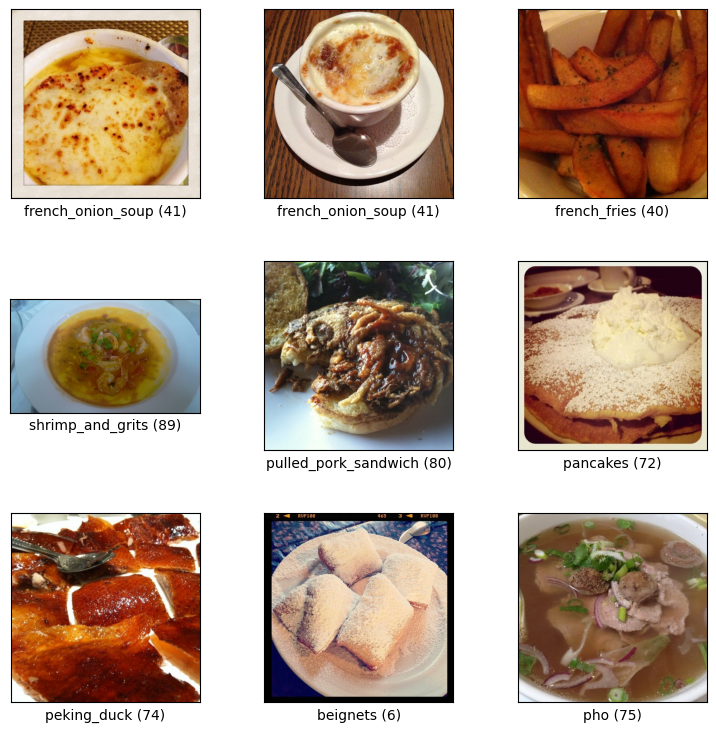

In [ ]:
fig = tfds.show_examples(valid_ds,ds_info)

In [ ]:
MAX_SIDE_LEN = 128
HOT_DOG_CLASS = 5
train_ds = train_ds.map(
    lambda image, label: (tf.cast(tf.image.resize(image, [MAX_SIDE_LEN, MAX_SIDE_LEN]), dtype=tf.int32),
                          tf.cast(label == HOT_DOG_CLASS, dtype=tf.int32))
)
valid_ds = valid_ds.map(
    lambda image, label: (tf.cast(tf.image.resize(image, [MAX_SIDE_LEN, MAX_SIDE_LEN]), dtype=tf.int32),
                          tf.cast(label == HOT_DOG_CLASS, dtype=tf.int32))
)

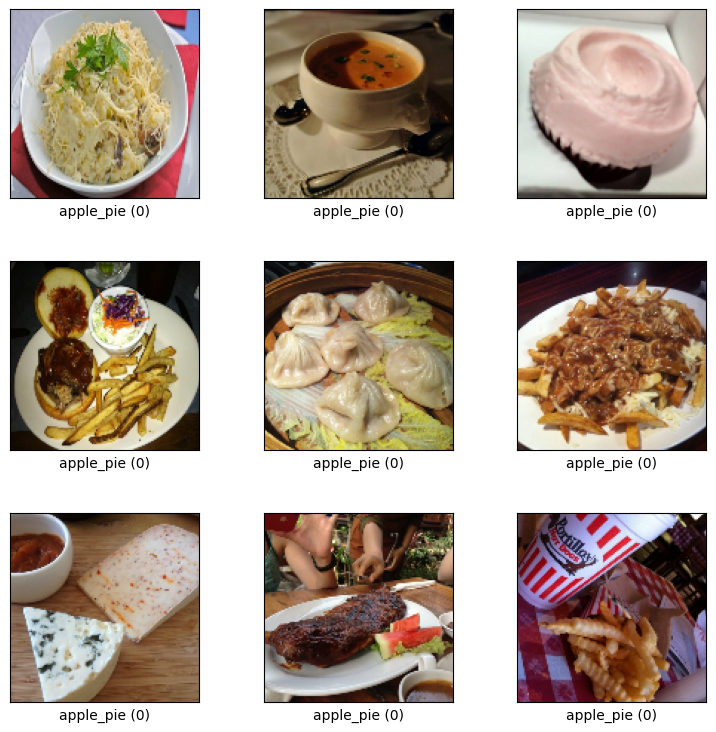

In [ ]:
fig = tfds.show_examples(valid_ds,ds_info)

In [ ]:
train_hd_size,valid_hd_size =750,250
train_hotdogs = train_ds.filter(lambda image,label:label ==1).repeat(3)
train_nothotdogs = train_ds.filter(lambda image,label:label ==0)

In [ ]:
valid_hotdogs = valid_ds.filter(lambda image,label:label ==1).repeat(3)
notvalid_nothotdogs = valid_ds.filter(lambda image,label:label ==0)

In [ ]:
batch_size = 16
train_ds = tf.data.Dataset.sample_from_datasets([train_hotdogs,train_nothotdogs],
                                                  [0.5,0.5],
                                                stop_on_empty_dataset=True)
train_ds = train_ds.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)
valid_ds = tf.data.Dataset.sample_from_datasets([train_hotdogs,train_nothotdogs],
                                                  [0.5,0.5],
                                                stop_on_empty_dataset=True)
valid_ds = valid_ds.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
for image_batch ,label_batch in train_ds.take(1):
  print(image_batch)
  print(label_batch)

tf.Tensor(
[[[[211 192 166]
   [209 191 170]
   [219 208 187]
   ...
   [216 205 181]
   [205 192 167]
   [212 197 172]]

  [[202 186 159]
   [207 192 168]
   [210 199 177]
   ...
   [220 210 189]
   [205 193 169]
   [213 199 173]]

  [[201 186 160]
   [214 201 180]
   [214 202 183]
   ...
   [218 209 191]
   [215 204 182]
   [213 200 175]]

  ...

  [[232 224 211]
   [233 225 215]
   [234 225 216]
   ...
   [231 222 210]
   [230 220 207]
   [230 218 203]]

  [[233 225 208]
   [230 221 209]
   [234 225 216]
   ...
   [228 219 208]
   [232 223 209]
   [233 221 206]]

  [[234 226 207]
   [236 226 213]
   [235 225 216]
   ...
   [231 222 210]
   [233 223 210]
   [232 220 205]]]


 [[[ 63  31  14]
   [ 60  30  19]
   [ 62  26  15]
   ...
   [126  71  30]
   [145  83  26]
   [114  60  19]]

  [[ 66  32  11]
   [ 73  39  21]
   [ 79  38  18]
   ...
   [117  65  28]
   [141  79  25]
   [129  67  28]]

  [[ 69  32  11]
   [ 70  29   7]
   [ 81  31   8]
   ...
   [ 98  51  15]
   [143  85  31]


Neural Net implementation


In [ ]:
random.seed(0)
model = models.Sequential()
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(128,(3,3), activation = 'relu',input_shape = [MAX_SIDE_LEN,MAX_SIDE_LEN,3]))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1))

In [ ]:
lr = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 50
hystory = model.fit(
    train_ds,
    validation_data = valid_ds,
    epochs=epochs,
    verbose=1
)

Epoch 1/50
    164/Unknown - 186s 1s/step - loss: 0.6512 - accuracy: 0.6025

In [ ]:
import tensorflow as tf
from tensorflow import Sequential,Dense